In [ ]:
# default_exp gbe.rtt.reliability

# Risk Taking Task - Reliability

<div>
    <p style="float: left;"><img src="images/gambling_task.png" alt="Drawing" style="width: 200px; border-right:30px solid white"/>
        </div>

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%reload_ext rpy2.ipython
import seaborn as sns
from matplotlib import pyplot as plt
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", font_scale = 1.3, rc=custom_params)
from trr265 import plotting

In [ ]:
#export
%load_ext autoreload
%autoreload 2
from trr265.gbe.rtt.data_provider import RTTDataProvider
import trr265.gbe.rtt.scoring as rtt_scoring 
import trr265.stats as stats
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the data
In this notebook, all tests and examples are run on the initial baseline dataset.

In [ ]:
# Getting raw data
dp = RTTDataProvider('/Users/hilmarzech/Projects/trr265/trr265/data/')
df = dp.get_rtt_data()
# Adding data from redcap
df = df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
# Filtering out replication and ema data
#df = df.query("is_initial and is_baseline")
df = df.query("is_baseline==True")


## Test-retest reliability

### Based on percentage gambles

#### Win

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.648,4.678,412.0,413.0,0.0,0.598,0.692,".65 (.60, .69)"
Single_random_raters,ICC2,0.648,4.713,412.0,412.0,0.0,0.599,0.693,".65 (.60, .69)"
Single_fixed_raters,ICC3,0.650,4.713,412.0,412.0,0.0,0.601,0.694,".65 (.60, .69)"
Average_raters_absolute,ICC1k,0.786,4.678,412.0,413.0,0.0,0.749,0.818,".79 (.75, .82)"
Average_random_raters,ICC2k,0.787,4.713,412.0,412.0,0.0,0.749,0.819,".79 (.75, .82)"
Average_fixed_raters,ICC3k,0.788,4.713,412.0,412.0,0.0,0.750,0.820,".79 (.75, .82)"


,variance,Percent
ID,0.066,0.648
Items,0.000,0.003
Residual,0.036,0.349
Total,0.102,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


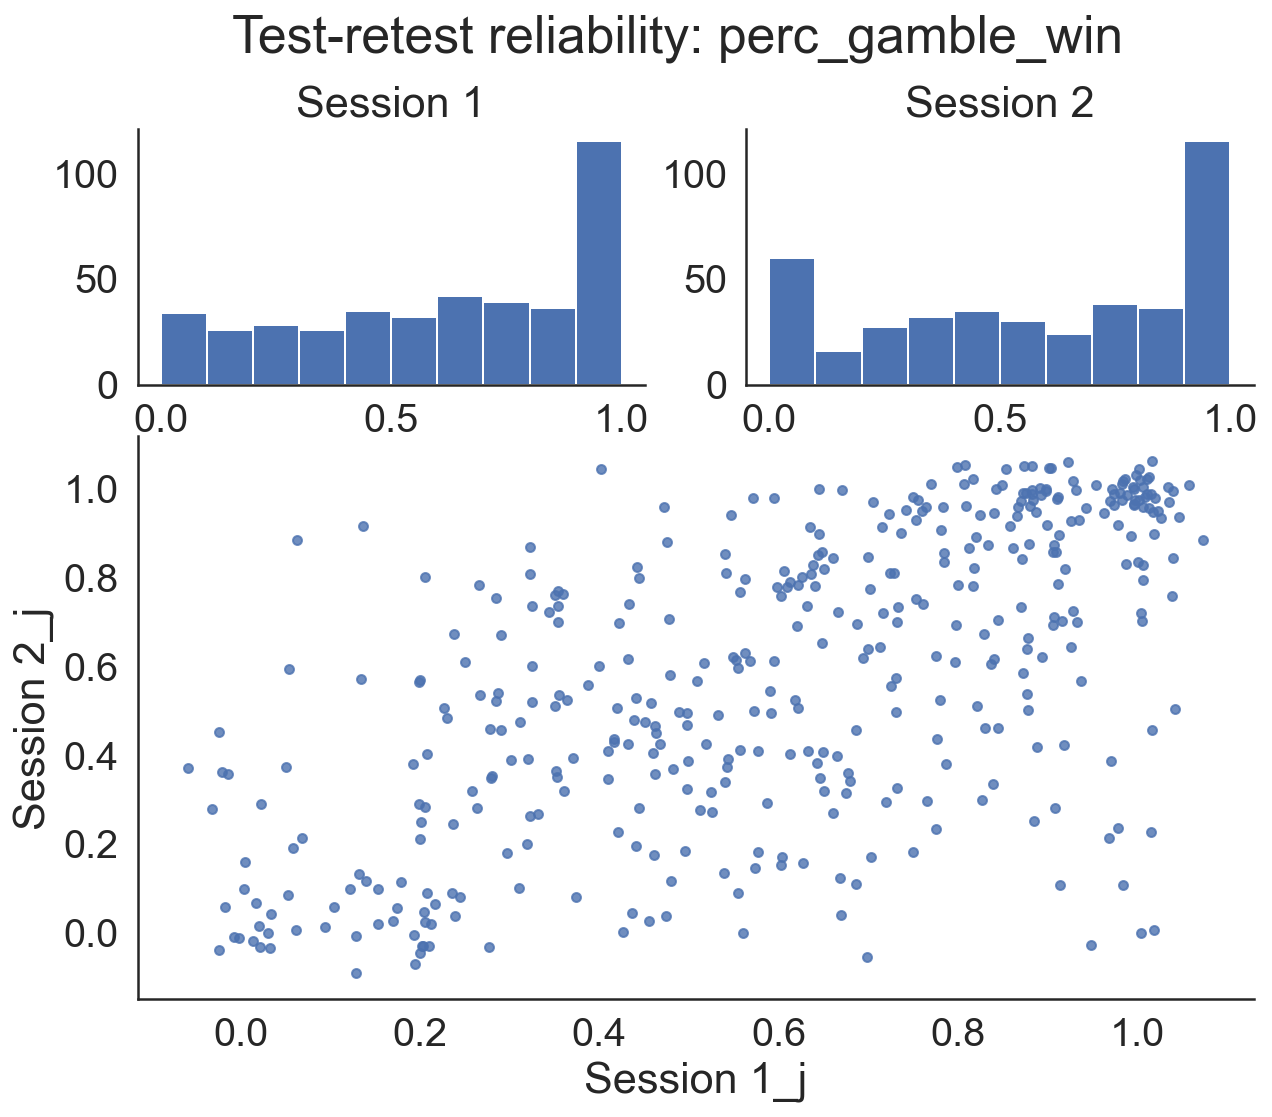

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.571,3.662,412.0,413.0,0.0,0.514,0.623,".57 (.51, .62)"
Single_random_raters,ICC2,0.579,4.040,412.0,412.0,0.0,0.498,0.647,".58 (.50, .65)"
Single_fixed_raters,ICC3,0.603,4.040,412.0,412.0,0.0,0.549,0.652,".60 (.55, .65)"
Average_raters_absolute,ICC1k,0.727,3.662,412.0,413.0,0.0,0.679,0.768,".73 (.68, .77)"
Average_random_raters,ICC2k,0.734,4.040,412.0,412.0,0.0,0.665,0.786,".73 (.66, .79)"
Average_fixed_raters,ICC3k,0.752,4.040,412.0,412.0,0.0,0.709,0.790,".75 (.71, .79)"


,variance,Percent
ID,0.052,0.579
Items,0.004,0.039
Residual,0.034,0.381
Total,0.089,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


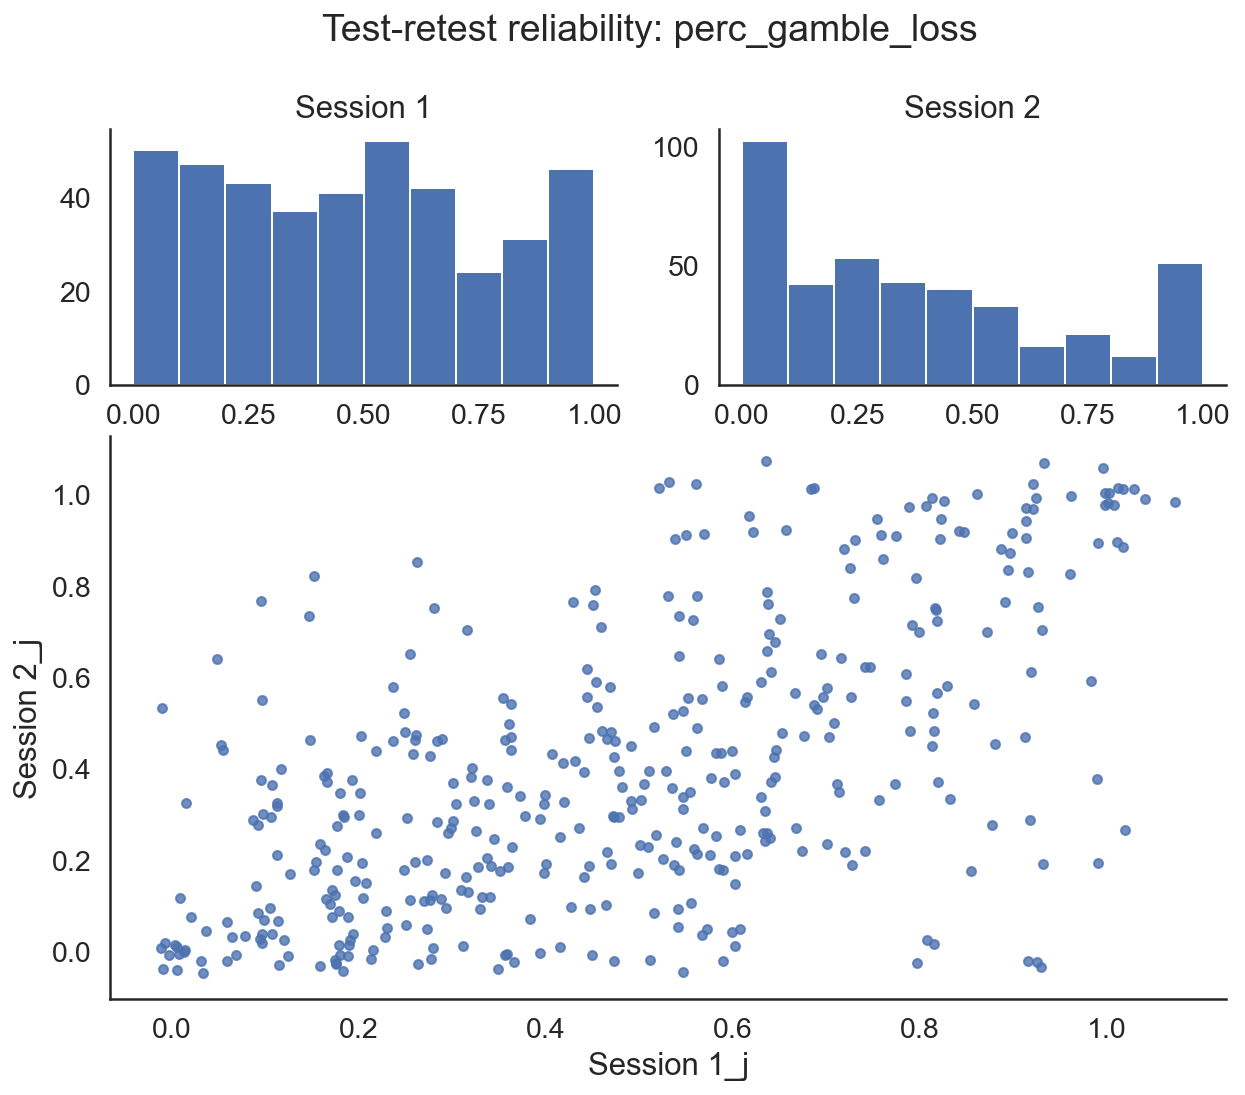

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.517,3.138,412.0,413.0,0.0,0.455,0.574,".52 (.45, .57)"
Single_random_raters,ICC2,0.523,3.333,412.0,412.0,0.0,0.453,0.586,".52 (.45, .59)"
Single_fixed_raters,ICC3,0.538,3.333,412.0,412.0,0.0,0.478,0.594,".54 (.48, .59)"
Average_raters_absolute,ICC1k,0.681,3.138,412.0,413.0,0.0,0.625,0.729,".68 (.63, .73)"
Average_random_raters,ICC2k,0.687,3.333,412.0,412.0,0.0,0.623,0.739,".69 (.62, .74)"
Average_fixed_raters,ICC3k,0.700,3.333,412.0,412.0,0.0,0.647,0.745,".70 (.65, .74)"


,variance,Percent
ID,0.046,0.523
Items,0.002,0.028
Residual,0.039,0.449
Total,0.088,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


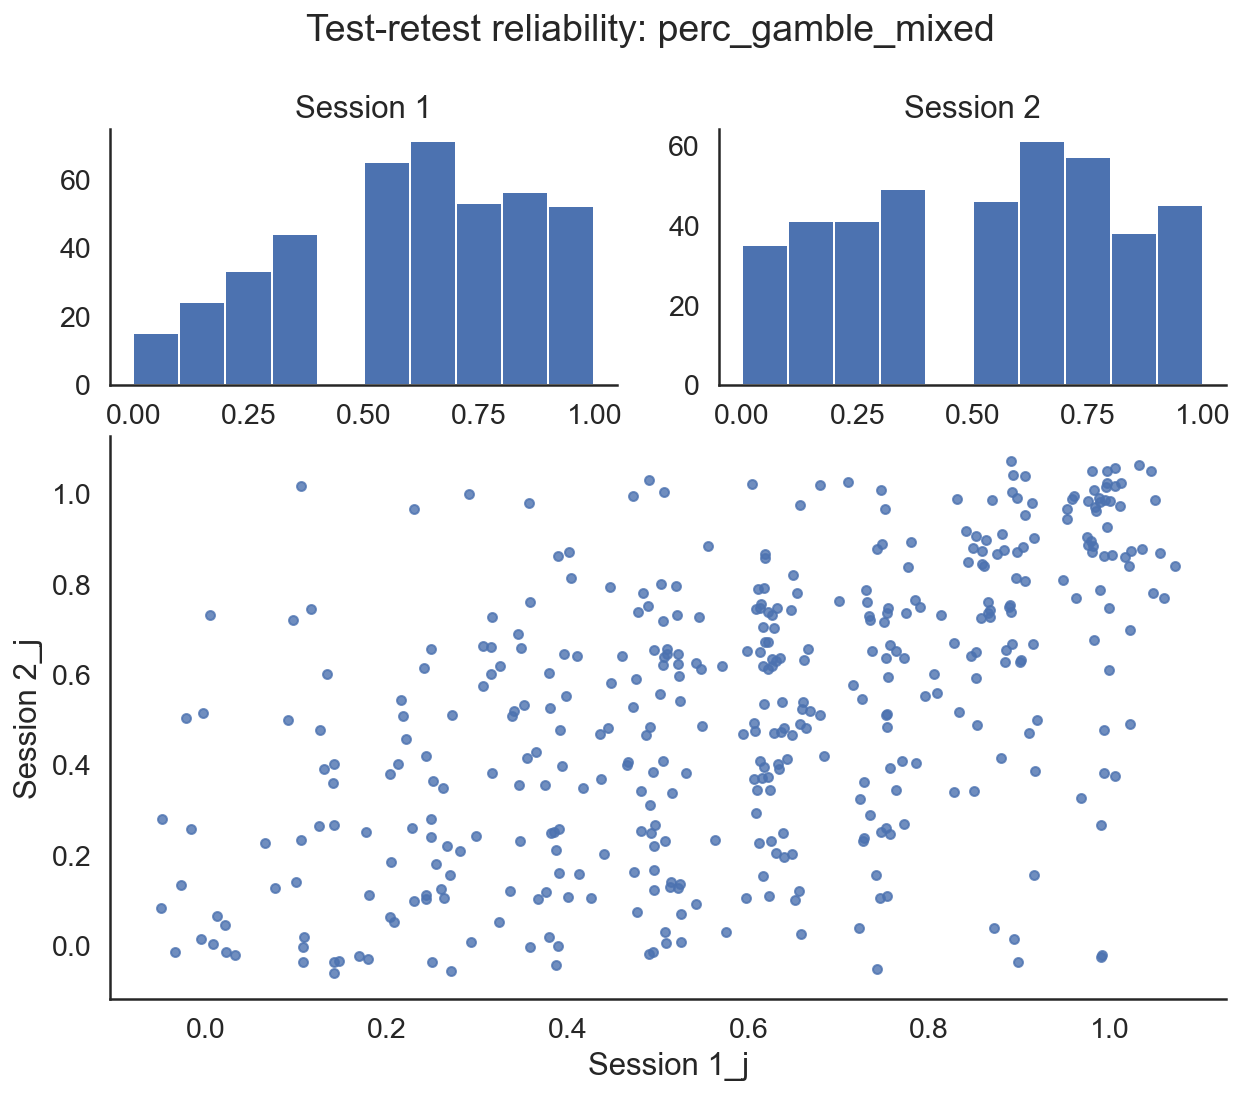

In [ ]:
_df = rtt_scoring.get_percentage_gamble(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')
iccs_mean_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_mixed', add_jitter = True)

### Based on predicted values (separate models)
Test-retest reliability for scores predicted by separate models for each session (for calculation of scores see `rtt_scoring.get_perc_gamble_predicted_sep`).

#### Win

In [ ]:
_df = rtt_scoring.get_perc_gamble_predicted_sep(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

R[write to console]: Lade nötiges Paket: lme4

R[write to console]: Lade nötiges Paket: Matrix

R[write to console]: 
Attache Paket: ‘lmerTest’


R[write to console]: Das folgende Objekt ist maskiert ‘package:lme4’:

    lmer


R[write to console]: Das folgende Objekt ist maskiert ‘package:stats’:

    step




,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.641,4.570,412.0,413.0,0.0,0.591,0.686,".64 (.59, .69)"
Single_random_raters,ICC2,0.642,4.619,412.0,412.0,0.0,0.591,0.687,".64 (.59, .69)"
Single_fixed_raters,ICC3,0.644,4.619,412.0,412.0,0.0,0.594,0.689,".64 (.59, .69)"
Average_raters_absolute,ICC1k,0.781,4.570,412.0,413.0,0.0,0.743,0.814,".78 (.74, .81)"
Average_random_raters,ICC2k,0.782,4.619,412.0,412.0,0.0,0.743,0.814,".78 (.74, .81)"
Average_fixed_raters,ICC3k,0.783,4.619,412.0,412.0,0.0,0.745,0.816,".78 (.75, .82)"


,variance,Percent
ID,0.050,0.642
Items,0.000,0.004
Residual,0.028,0.355
Total,0.079,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


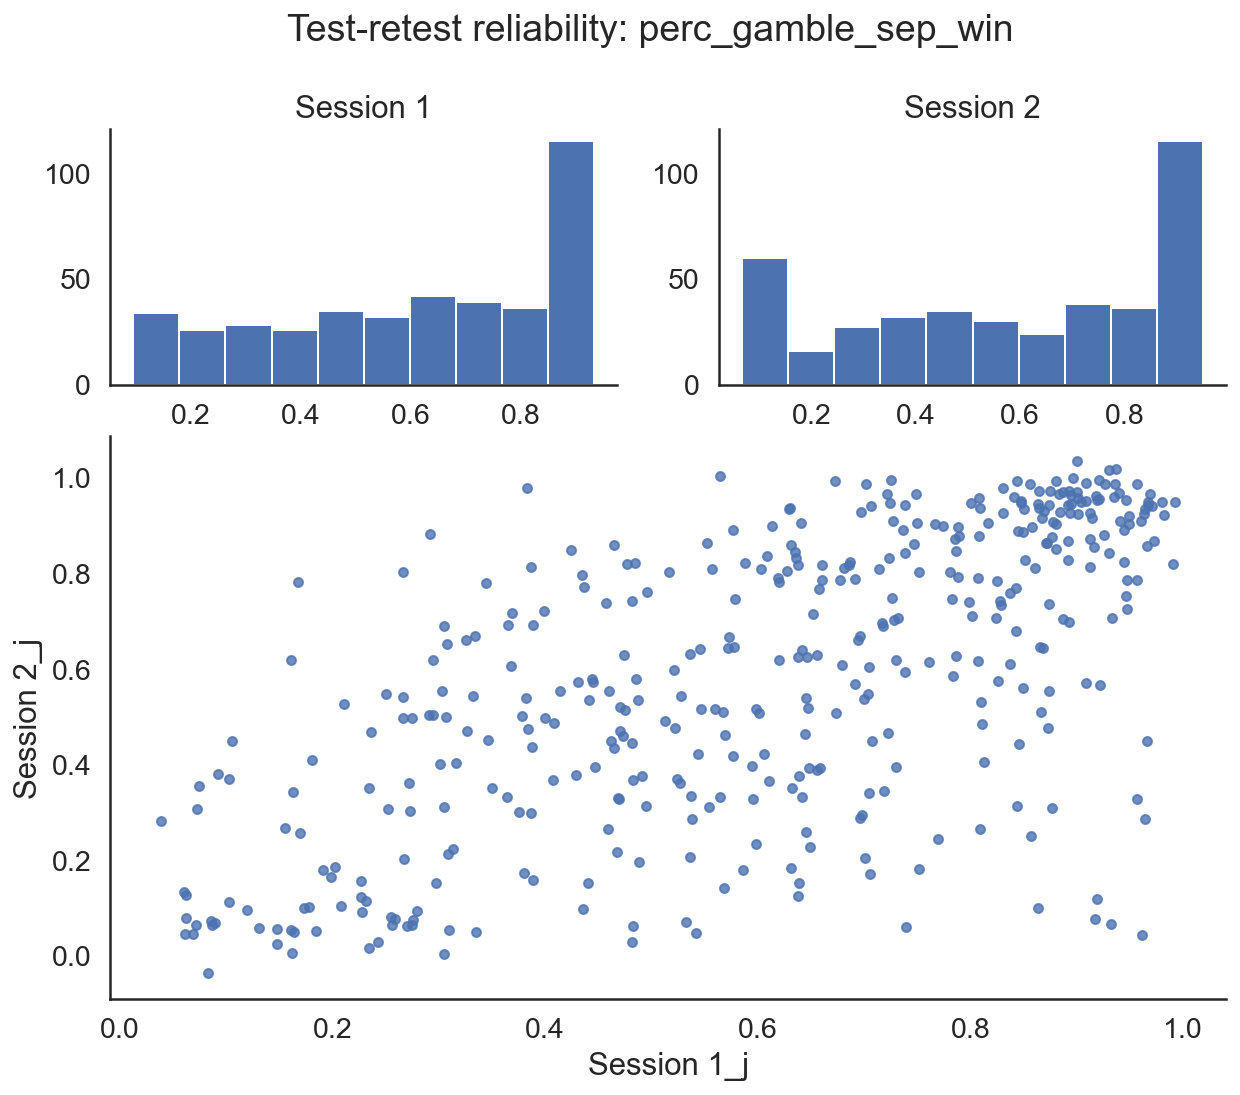

In [ ]:
iccs_trial_sep_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.544,3.389,412.0,413.0,0.0,0.485,0.599,".54 (.48, .60)"
Single_random_raters,ICC2,0.558,3.925,412.0,412.0,0.0,0.451,0.642,".56 (.45, .64)"
Single_fixed_raters,ICC3,0.594,3.925,412.0,412.0,0.0,0.539,0.644,".59 (.54, .64)"
Average_raters_absolute,ICC1k,0.705,3.389,412.0,413.0,0.0,0.653,0.749,".70 (.65, .75)"
Average_random_raters,ICC2k,0.716,3.925,412.0,412.0,0.0,0.621,0.782,".72 (.62, .78)"
Average_fixed_raters,ICC3k,0.745,3.925,412.0,412.0,0.0,0.700,0.783,".75 (.70, .78)"


,variance,Percent
ID,0.035,0.558
Items,0.004,0.060
Residual,0.024,0.382
Total,0.062,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


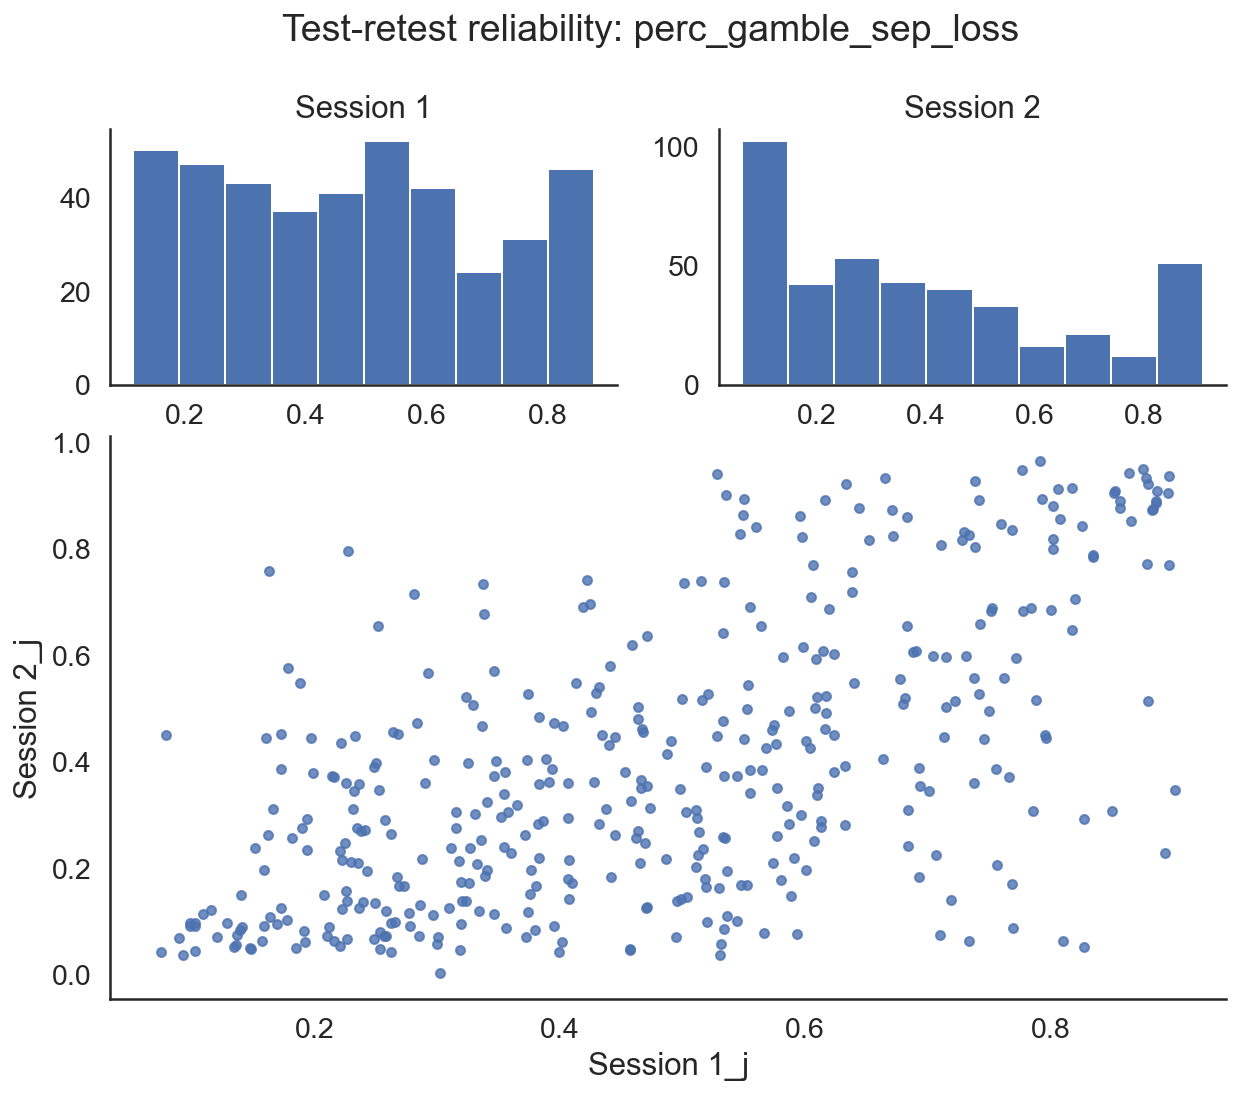

In [ ]:
iccs_trial_sep_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.484,2.874,412.0,413.0,0.0,0.419,0.543,".48 (.42, .54)"
Single_random_raters,ICC2,0.497,3.209,412.0,412.0,0.0,0.406,0.574,".50 (.41, .57)"
Single_fixed_raters,ICC3,0.525,3.209,412.0,412.0,0.0,0.464,0.581,".52 (.46, .58)"
Average_raters_absolute,ICC1k,0.652,2.874,412.0,413.0,0.0,0.591,0.704,".65 (.59, .70)"
Average_random_raters,ICC2k,0.664,3.209,412.0,412.0,0.0,0.577,0.730,".66 (.58, .73)"
Average_fixed_raters,ICC3k,0.688,3.209,412.0,412.0,0.0,0.633,0.735,".69 (.63, .74)"


,variance,Percent
ID,0.024,0.497
Items,0.003,0.052
Residual,0.022,0.450
Total,0.049,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


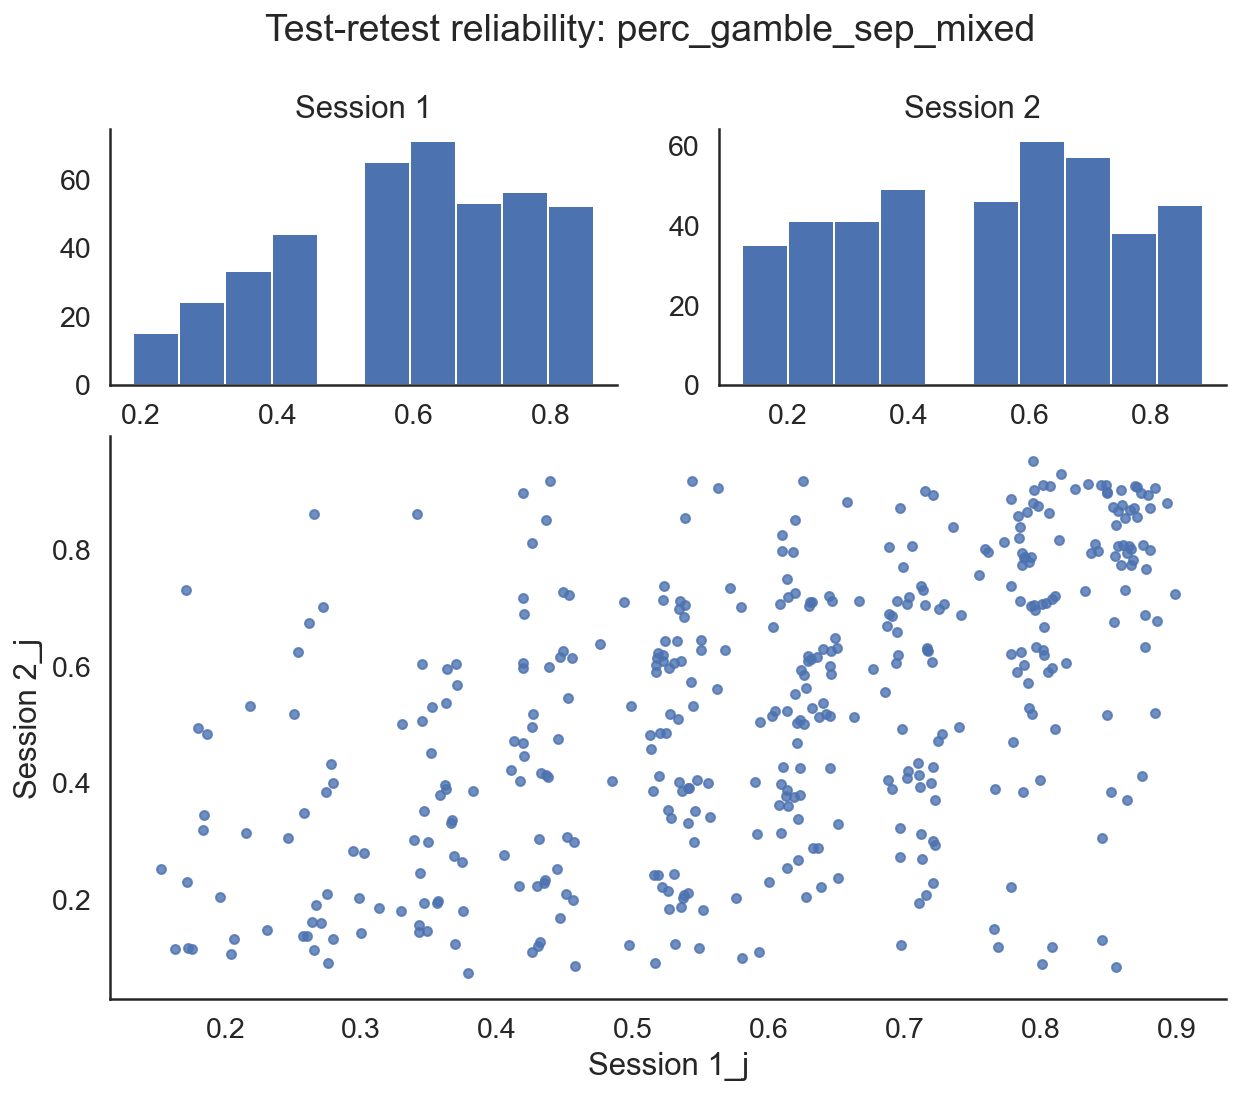

In [ ]:
iccs_trial_sep_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_sep_mixed', add_jitter = True)

### Based on predicted values (joint model)
Test-retest reliability for scores predicted by a joint model (for calculation of scores see `rtt_scoring.get_perc_gamble_predicted_joint`).

#### Win

In [ ]:
_df, ms = rtt_scoring.get_perc_gamble_predicted_joint(df)
_df = _df.merge(dp.get_gbe_data(columns = ['participant','session_number','is_initial','is_baseline']), left_on = 'gbe_index', right_index = True, how = 'left')

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.826,10.496,412.0,413.0,0.0,0.798,0.850,".83 (.80, .85)"
Single_random_raters,ICC2,0.826,10.589,412.0,412.0,0.0,0.798,0.850,".83 (.80, .85)"
Single_fixed_raters,ICC3,0.827,10.589,412.0,412.0,0.0,0.800,0.851,".83 (.80, .85)"
Average_raters_absolute,ICC1k,0.905,10.496,412.0,413.0,0.0,0.888,0.919,".90 (.89, .92)"
Average_random_raters,ICC2k,0.905,10.589,412.0,412.0,0.0,0.888,0.919,".90 (.89, .92)"
Average_fixed_raters,ICC3k,0.906,10.589,412.0,412.0,0.0,0.889,0.920,".91 (.89, .92)"


,variance,Percent
ID,0.065,0.826
Items,0.000,0.002
Residual,0.014,0.172
Total,0.079,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


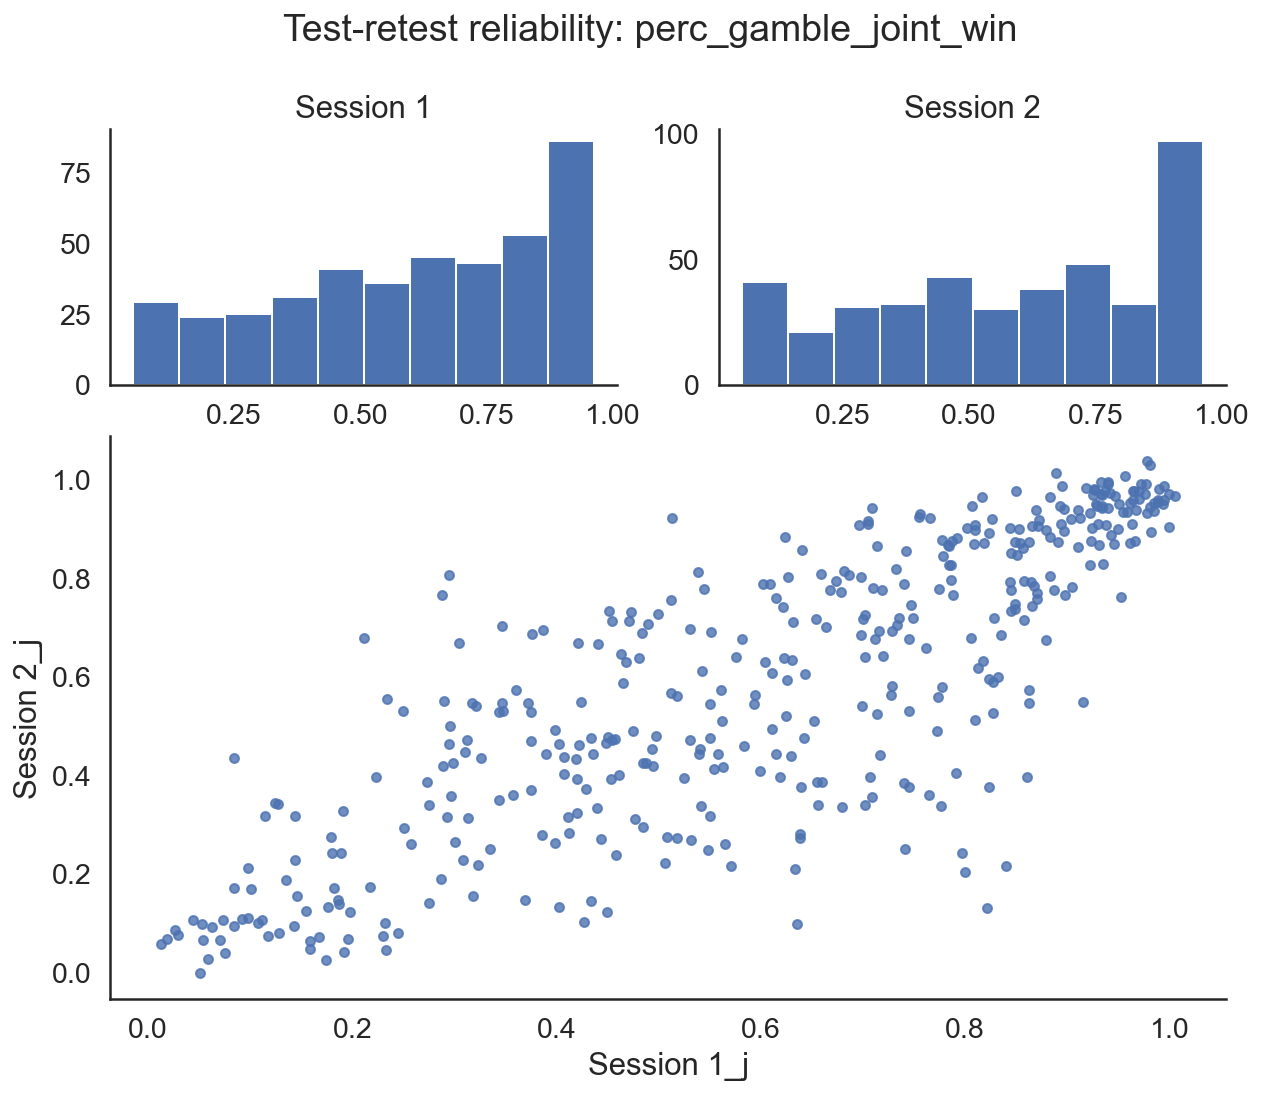

In [ ]:
iccs_trial_joint_win = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_win', add_jitter = True)

#### Loss

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.794,8.714,412.0,413.0,0.0,0.762,0.822,".79 (.76, .82)"
Single_random_raters,ICC2,0.796,9.591,412.0,412.0,0.0,0.744,0.836,".80 (.74, .84)"
Single_fixed_raters,ICC3,0.811,9.591,412.0,412.0,0.0,0.782,0.837,".81 (.78, .84)"
Average_raters_absolute,ICC1k,0.885,8.714,412.0,413.0,0.0,0.865,0.902,".89 (.87, .90)"
Average_random_raters,ICC2k,0.886,9.591,412.0,412.0,0.0,0.853,0.910,".89 (.85, .91)"
Average_fixed_raters,ICC3k,0.896,9.591,412.0,412.0,0.0,0.877,0.911,".90 (.88, .91)"


,variance,Percent
ID,0.049,0.796
Items,0.001,0.019
Residual,0.011,0.185
Total,0.061,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


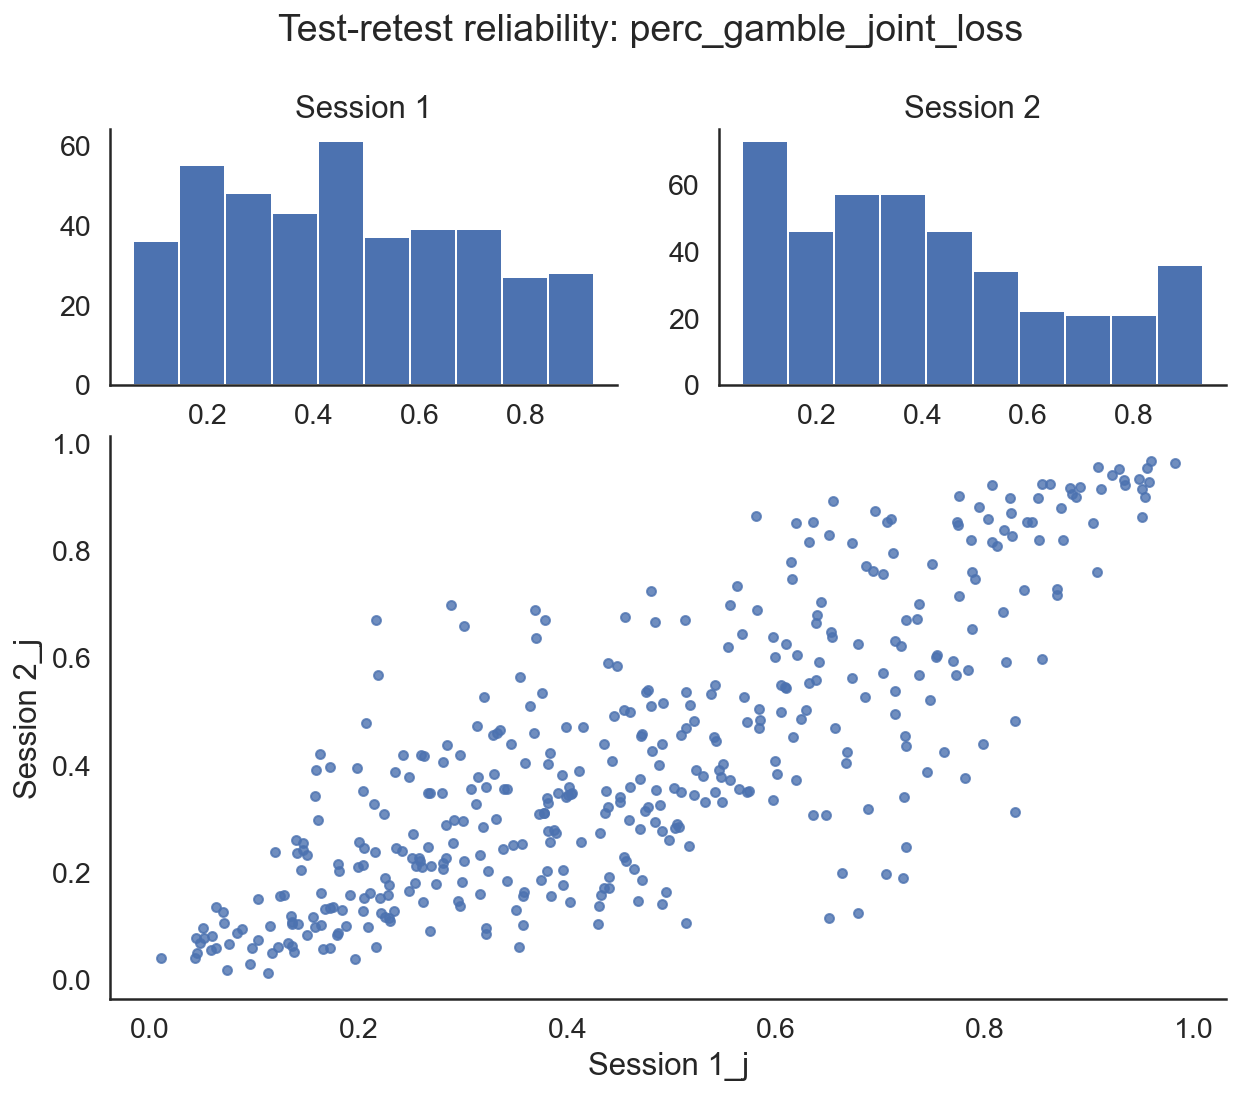

In [ ]:
iccs_trial_joint_loss = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_loss', add_jitter = True)

#### Mixed

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
Single_raters_absolute,ICC1,0.841,11.593,412.0,413.0,0.0,0.816,0.863,".84 (.82, .86)"
Single_random_raters,ICC2,0.842,12.298,412.0,412.0,0.0,0.809,0.868,".84 (.81, .87)"
Single_fixed_raters,ICC3,0.850,12.298,412.0,412.0,0.0,0.825,0.871,".85 (.83, .87)"
Average_raters_absolute,ICC1k,0.914,11.593,412.0,413.0,0.0,0.899,0.927,".91 (.90, .93)"
Average_random_raters,ICC2k,0.914,12.298,412.0,412.0,0.0,0.895,0.930,".91 (.89, .93)"
Average_fixed_raters,ICC3k,0.919,12.298,412.0,412.0,0.0,0.904,0.931,".92 (.90, .93)"


,variance,Percent
ID,0.041,0.842
Items,0.000,0.009
Residual,0.007,0.149
Total,0.049,1.000


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


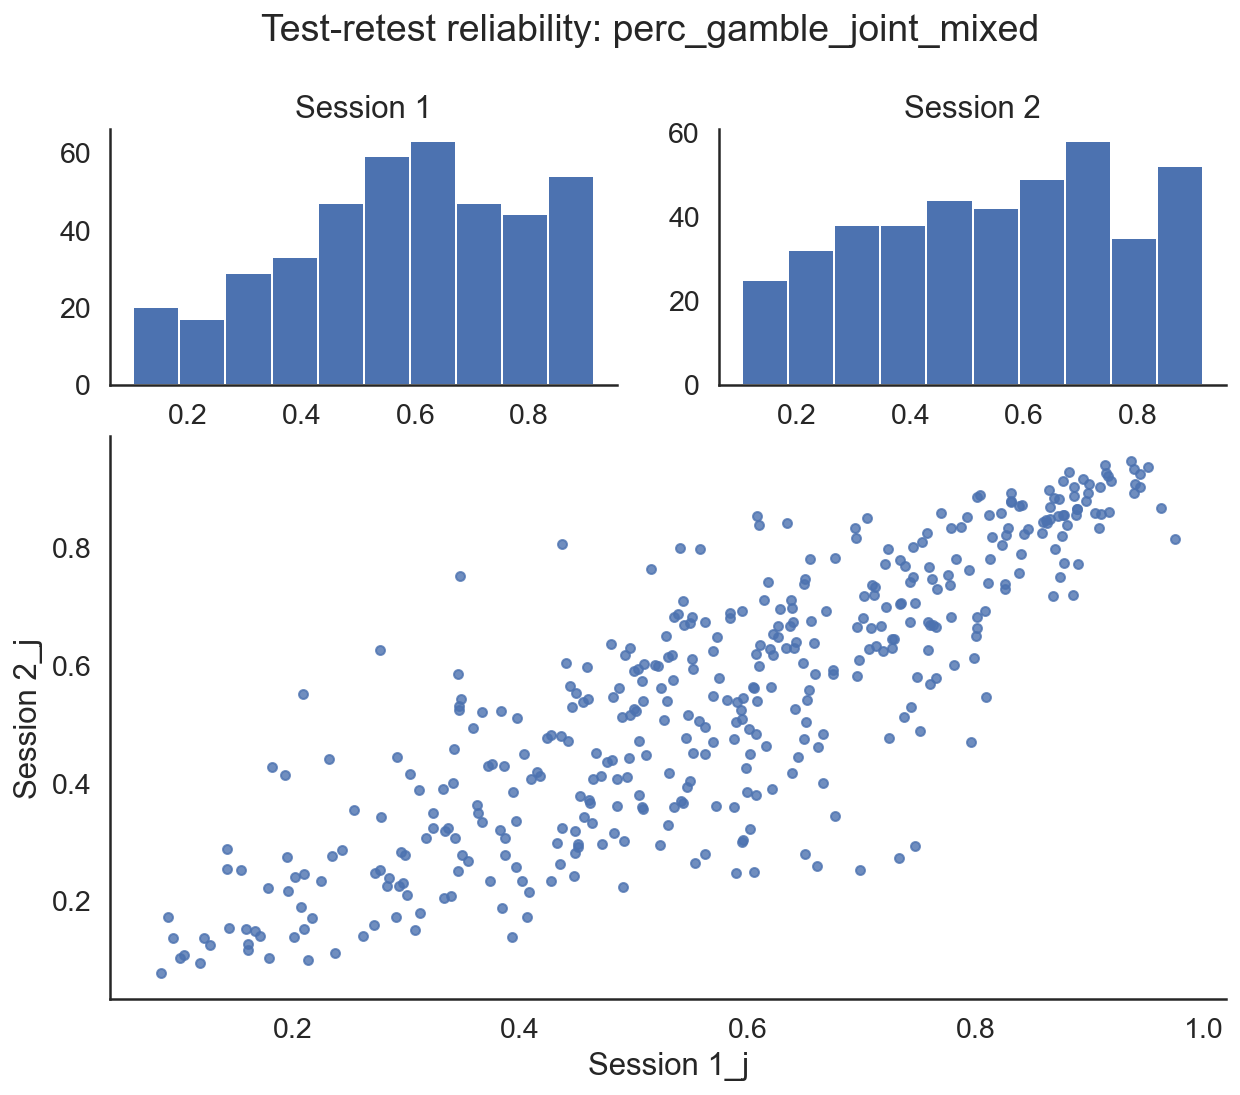

In [ ]:
iccs_trial_joint_mixed = stats.analyze_reliability(_df, dependent = 'perc_gamble_joint_mixed', add_jitter = True)

### Based on model-calculated variances

#### Win

In [ ]:
iccs_mod_win = stats.get_model_calculated_icc(ms['win'])
iccs_mod_win['icc']

R[write to console]: Lade nötiges Paket: insight



0.7990257368571998

#### Loss

In [ ]:
iccs_mod_loss = stats.get_model_calculated_icc(ms['loss'])
iccs_mod_loss['icc']

0.7297376145649078

#### Win

In [ ]:
iccs_mod_mixed = stats.get_model_calculated_icc(ms['mixed'])
iccs_mod_mixed['icc']

0.7494721398090646

## Comparison of methods

### All methods

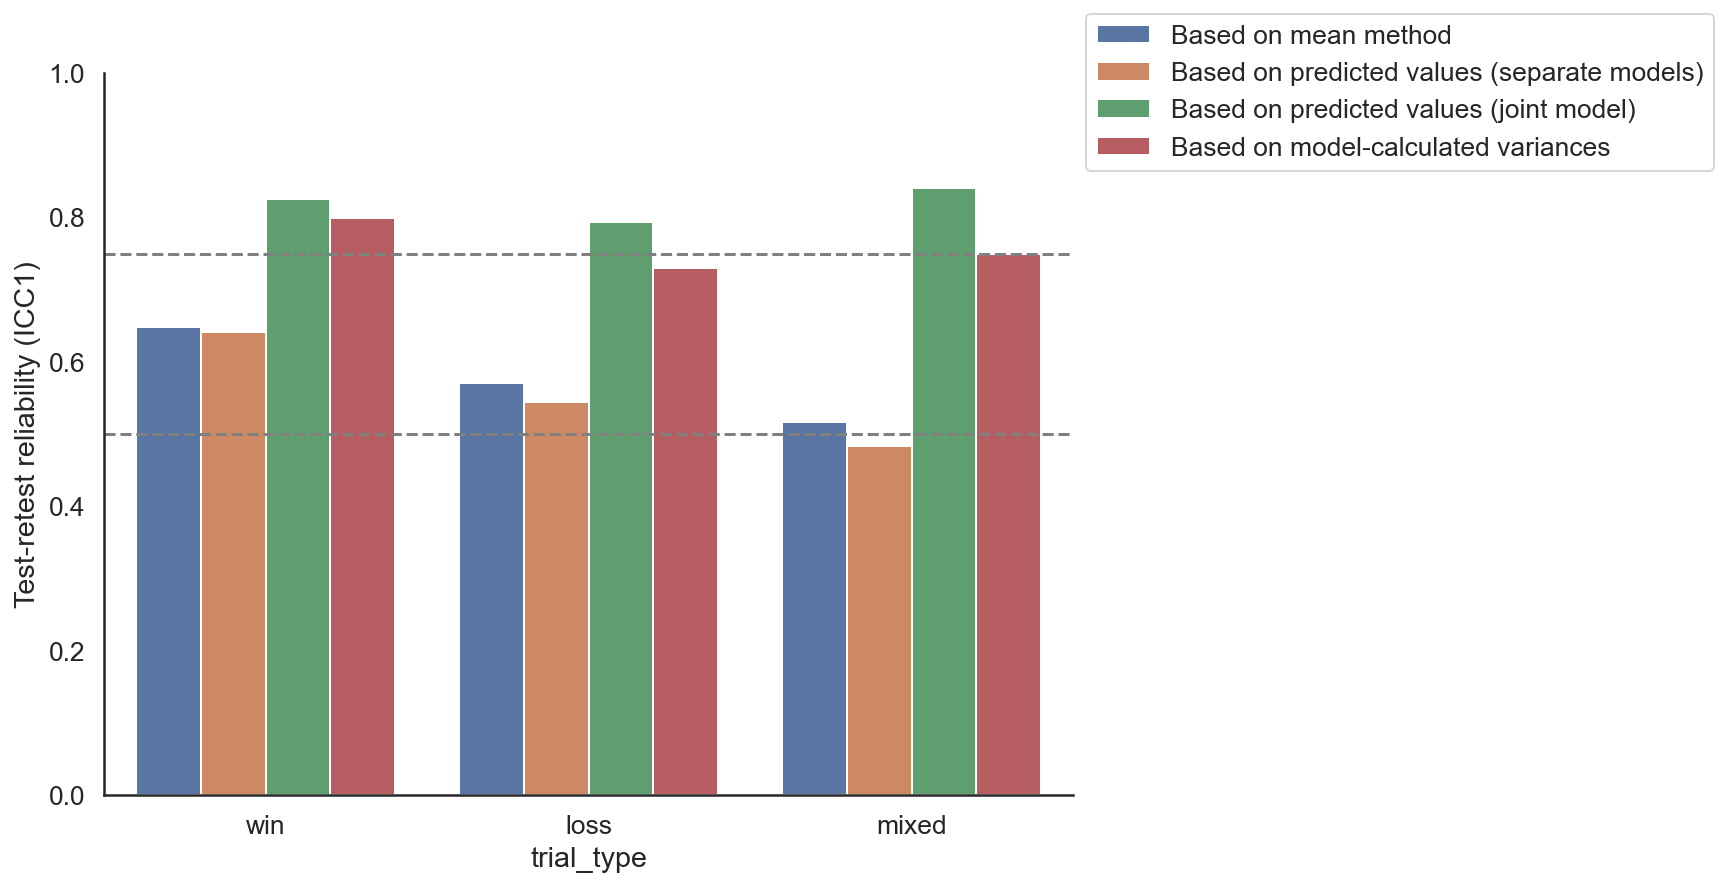

In [ ]:
iccs = {
    "Based on mean method_win": iccs_mean_win,
    "Based on mean method_loss": iccs_mean_loss,
    "Based on mean method_mixed": iccs_mean_mixed,
    "trial_sep_win": iccs_trial_sep_win,
    "trial_sep_loss": iccs_trial_sep_loss,
    "trial_sep_mixed": iccs_trial_sep_mixed,
    "trial_joint_win": iccs_trial_joint_win,
    "trial_joint_loss": iccs_trial_joint_loss,
    "trial_joint_mixed": iccs_trial_joint_mixed,
    "model_calc_win": iccs_mod_win,
    "model_calc_loss": iccs_mod_loss,
    "model_calc_mixed": iccs_mod_mixed
}

g = plotting.icc_comparison_plot(iccs, aspect = 1.3,qualitative_labels = True, 
                        x_offset = 3.5, font_scale = 1.2)

### Selected methods for manuscript

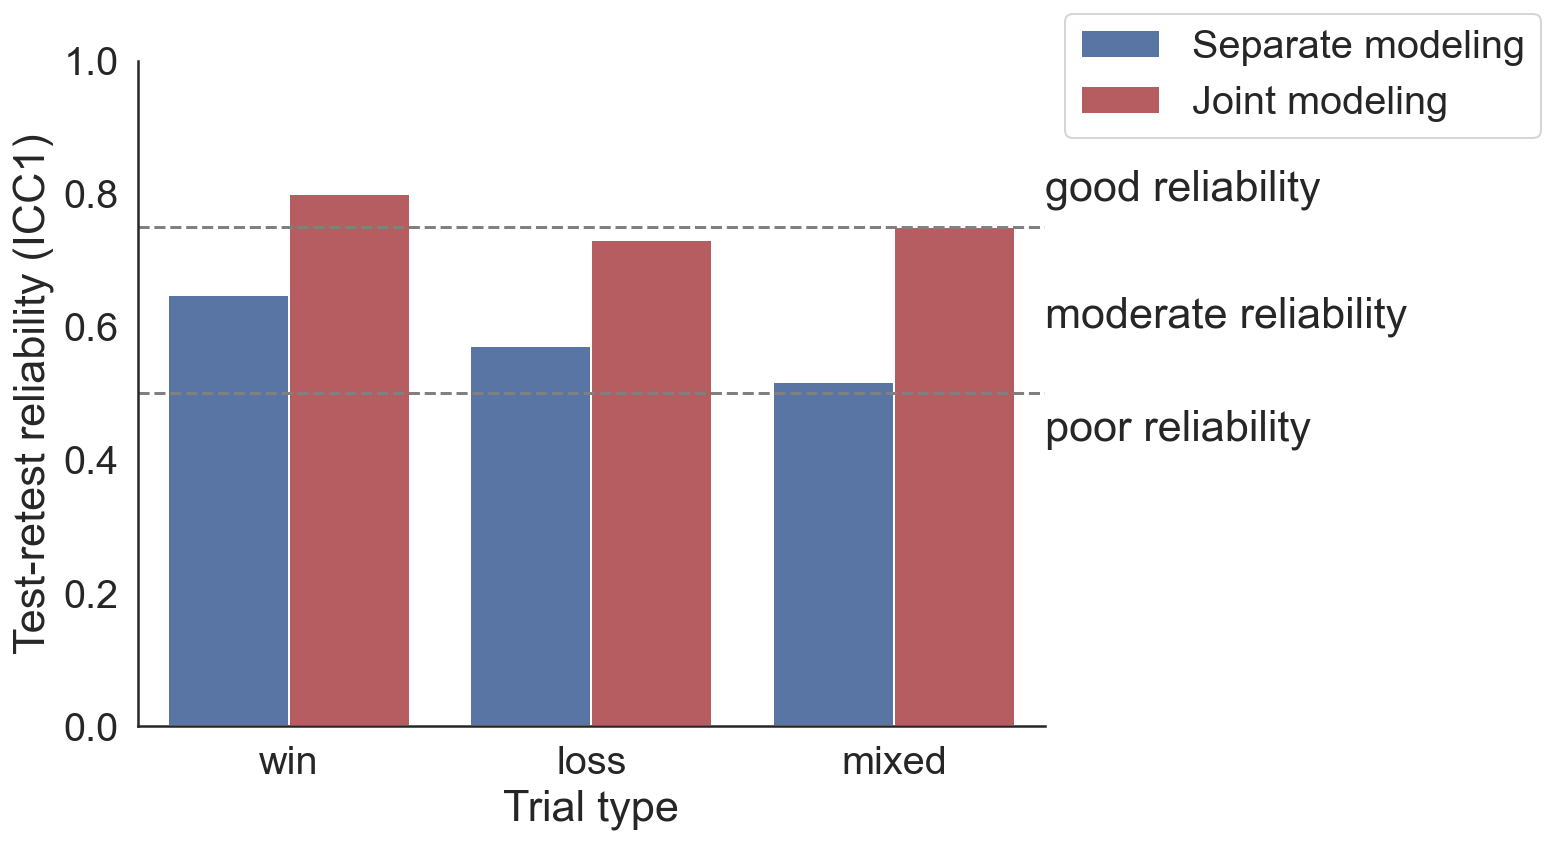

In [ ]:
iccs = {
    "Separate modeling_win": iccs_mean_win,
    "Separate modeling_loss": iccs_mean_loss,
    "Separate modeling_mixed": iccs_mean_mixed,
    "Joint modeling_win": iccs_mod_win,
    "Joint modeling_loss": iccs_mod_loss,
    "Joint modeling_mixed": iccs_mod_mixed
}

palette=sns.color_palette([(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)])
g = plotting.icc_comparison_plot(iccs, 
                       
                       palette = palette,
                       aspect = 1.3,
                       qualitative_labels = True,
                       x_offset = 2.5,
                       font_scale = 1.8)

ax = g.axes[0][0]

ax.set_xlabel('Trial type');


## Variance proportions

### Win

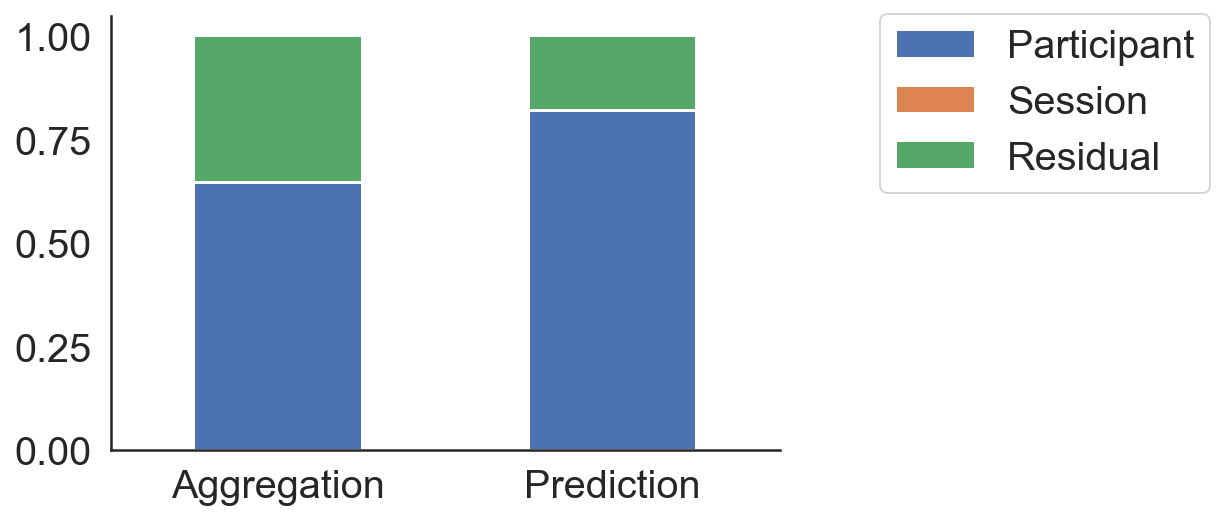

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_win,'Prediction':iccs_trial_joint_win})
#ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.646046,0.003097,0.350857
Prediction,0.818966,0.001778,0.179256


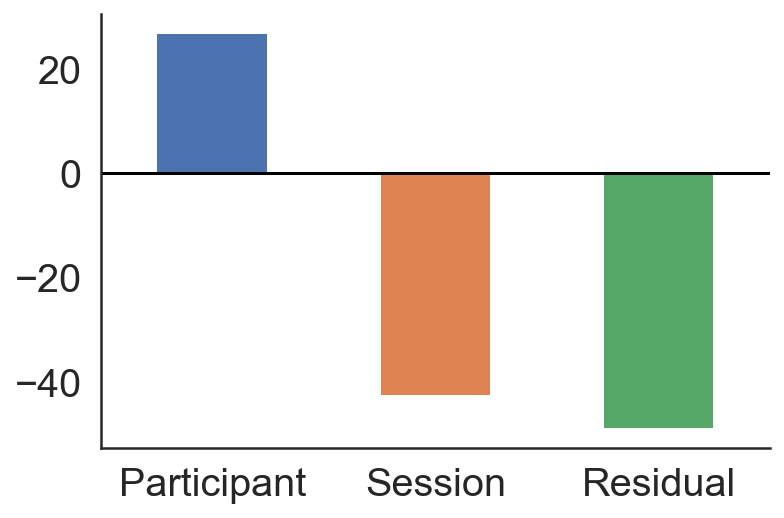

In [ ]:
def var_comp_plot_2(results):
    perc_variance = []
    for r in results.items():
        _df = r[1]['iccs'][1].T
        _df.columns = ['Participant','Session','Residual','Total']
        perc_variance.append(_df[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    display(df)
    df.iloc[1] = df.iloc[1]/df.iloc[0]
    df = (df-1)*100
    
    ax = df.iloc[1].plot(kind = 'bar', stacked = False, color = sns.color_palette()[:3])
    ax.grid(False)
    sns.despine()
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)
    ax.axhline(0, color = 'black')
    #ax.set_ylim([-100,100])
    return ax

ax = var_comp_plot_2({'Aggregation':iccs_mean_win,'Prediction':iccs_trial_joint_win})
ax.get_legend().remove()

### Loss

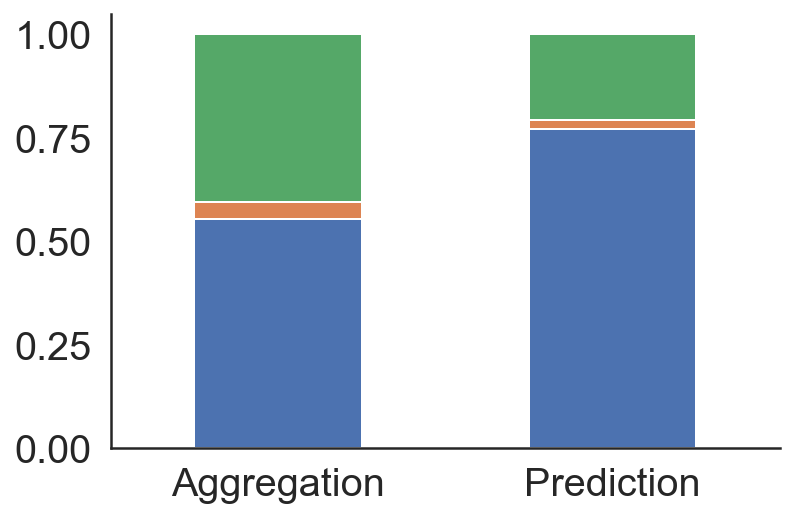

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_loss,'Prediction':iccs_trial_joint_loss})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.552776,0.042814,0.404410
Prediction,0.770861,0.021556,0.207583


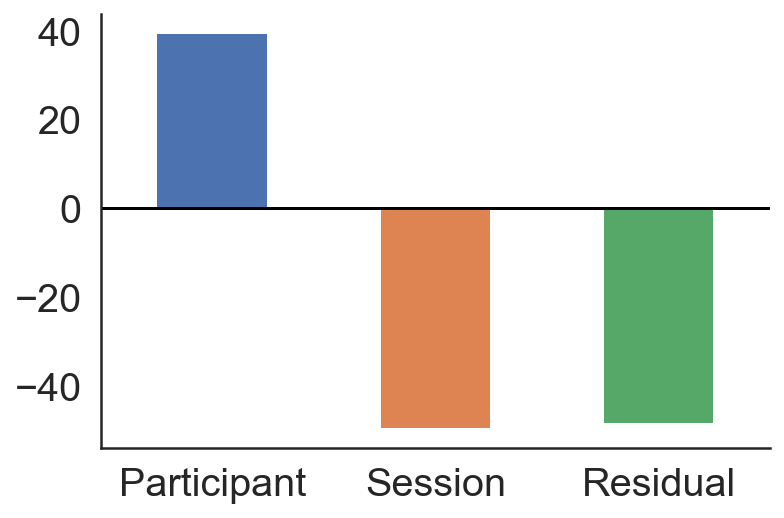

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_loss,'Prediction':iccs_trial_joint_loss})
ax.get_legend().remove()

### Mixed

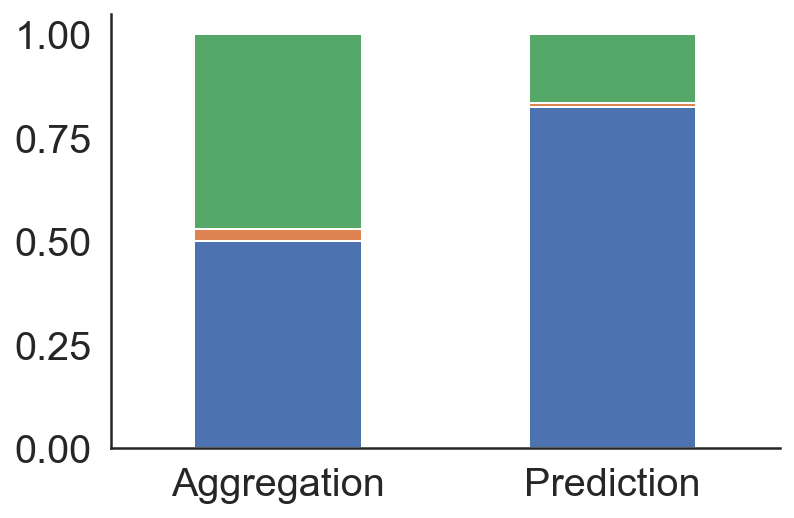

In [ ]:
ax = stats.var_comp_plot({'Aggregation':iccs_mean_mixed,'Prediction':iccs_trial_joint_mixed})
ax.get_legend().remove()

,Participant,Session,Residual
Aggregation,0.500119,0.028510,0.471371
Prediction,0.823183,0.009749,0.167068


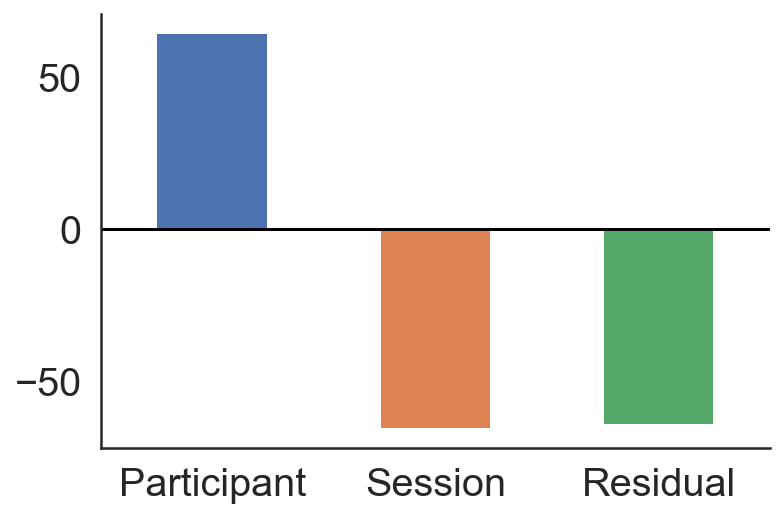

In [ ]:
ax = var_comp_plot_2({'Aggregation':iccs_mean_mixed,'Prediction':iccs_trial_joint_mixed})
ax.get_legend().remove()

## Effect of time

In [ ]:
gbe = dp.get_gbe_data()

In [ ]:
scores = stats.get_scores(dp, dp.get_rtt_data, rtt_scoring.get_perc_gamble_predicted_joint)

### Win

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



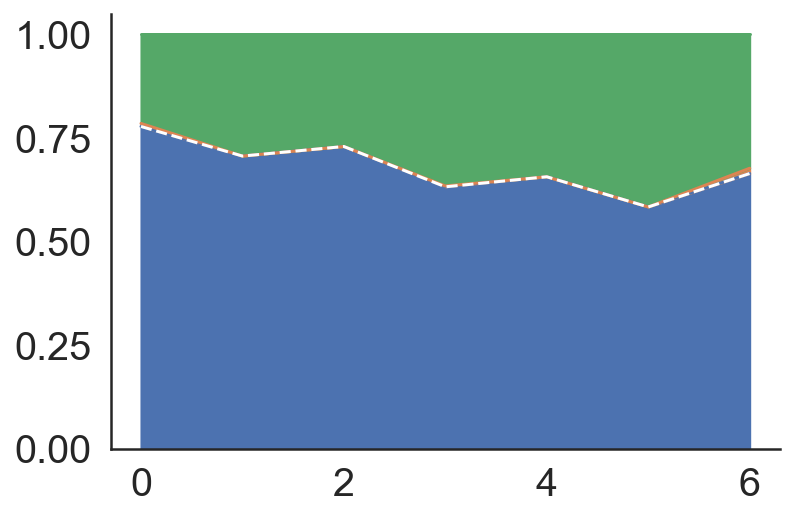

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_gamble_joint_win")

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



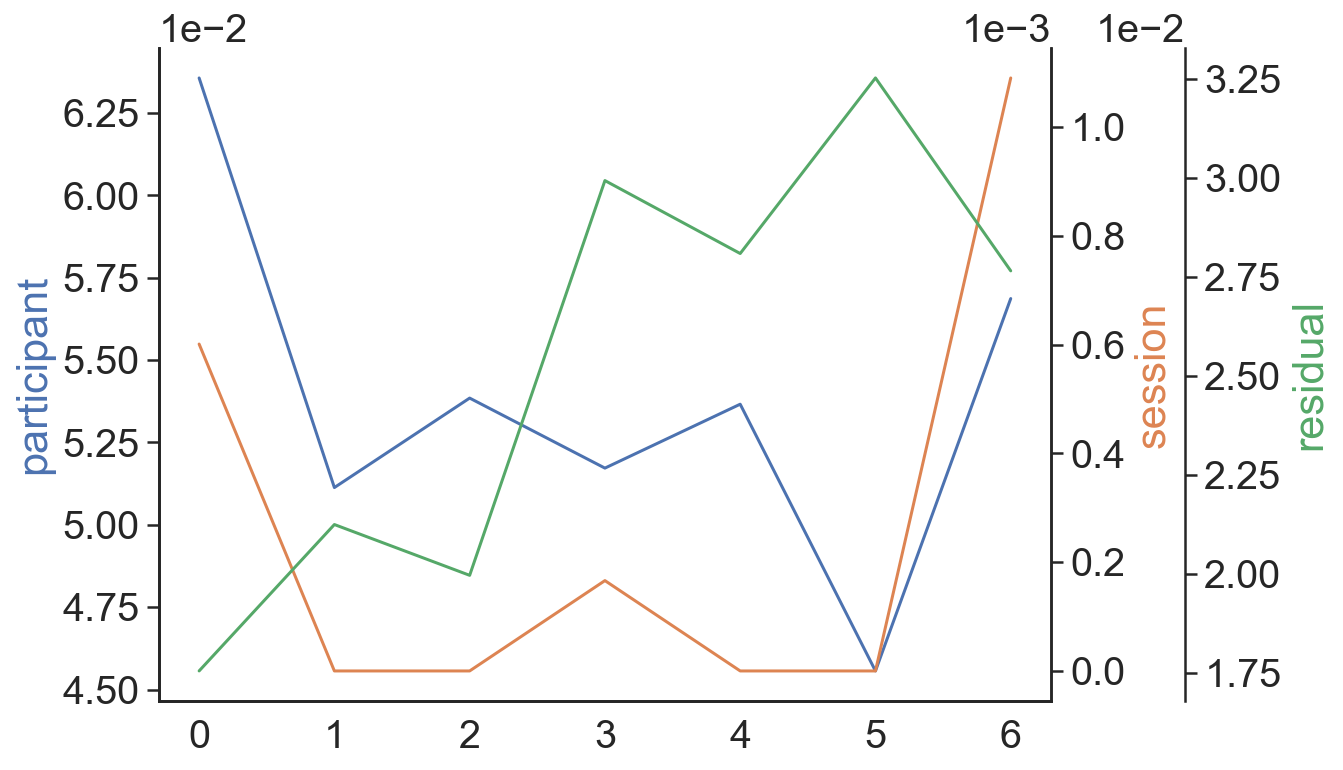

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



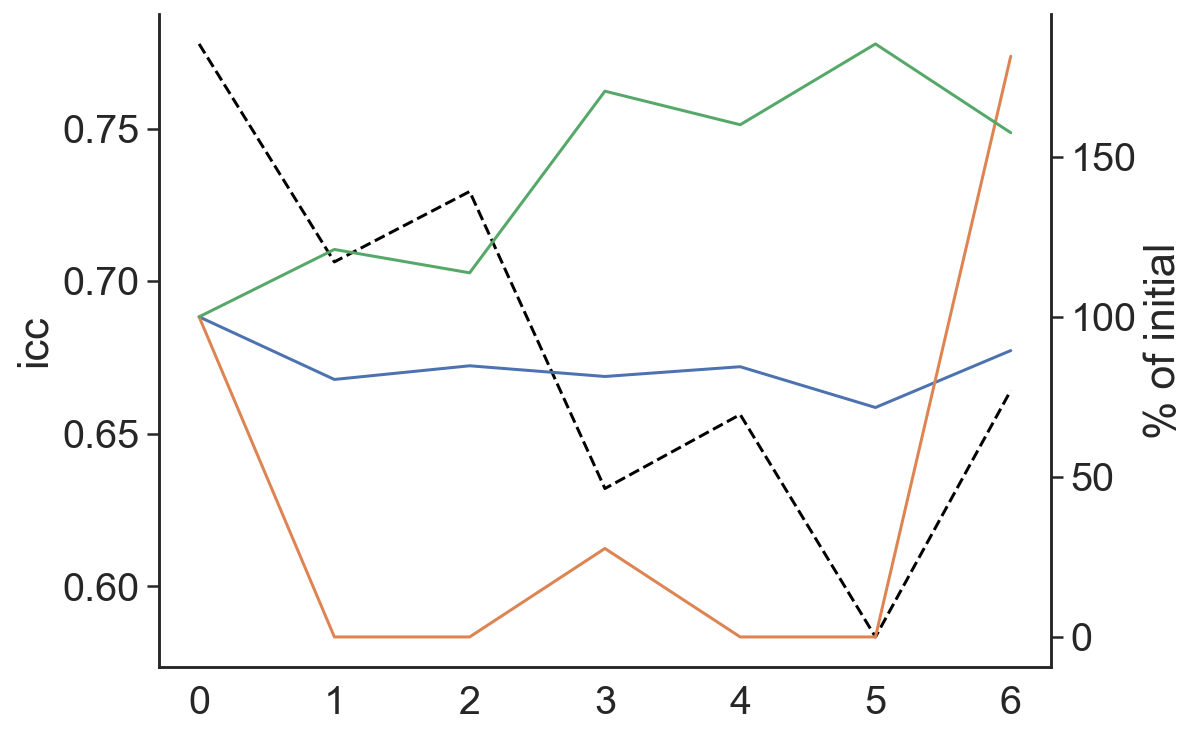

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### Loss

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



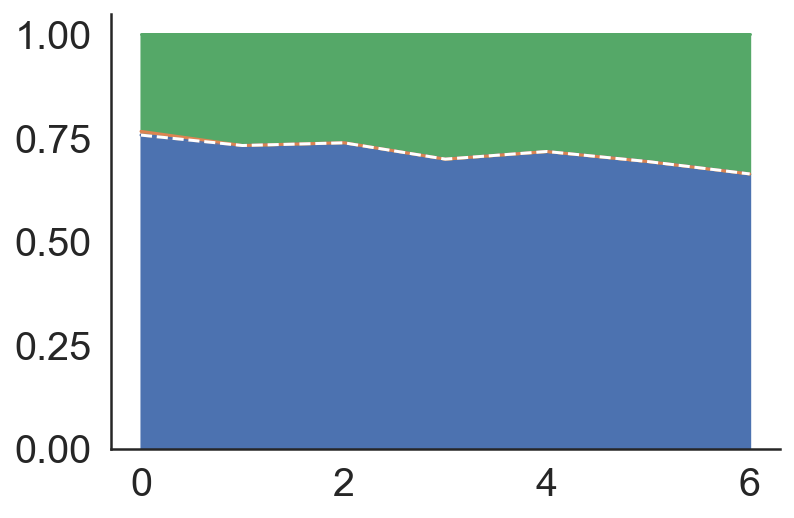

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_gamble_joint_loss")

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



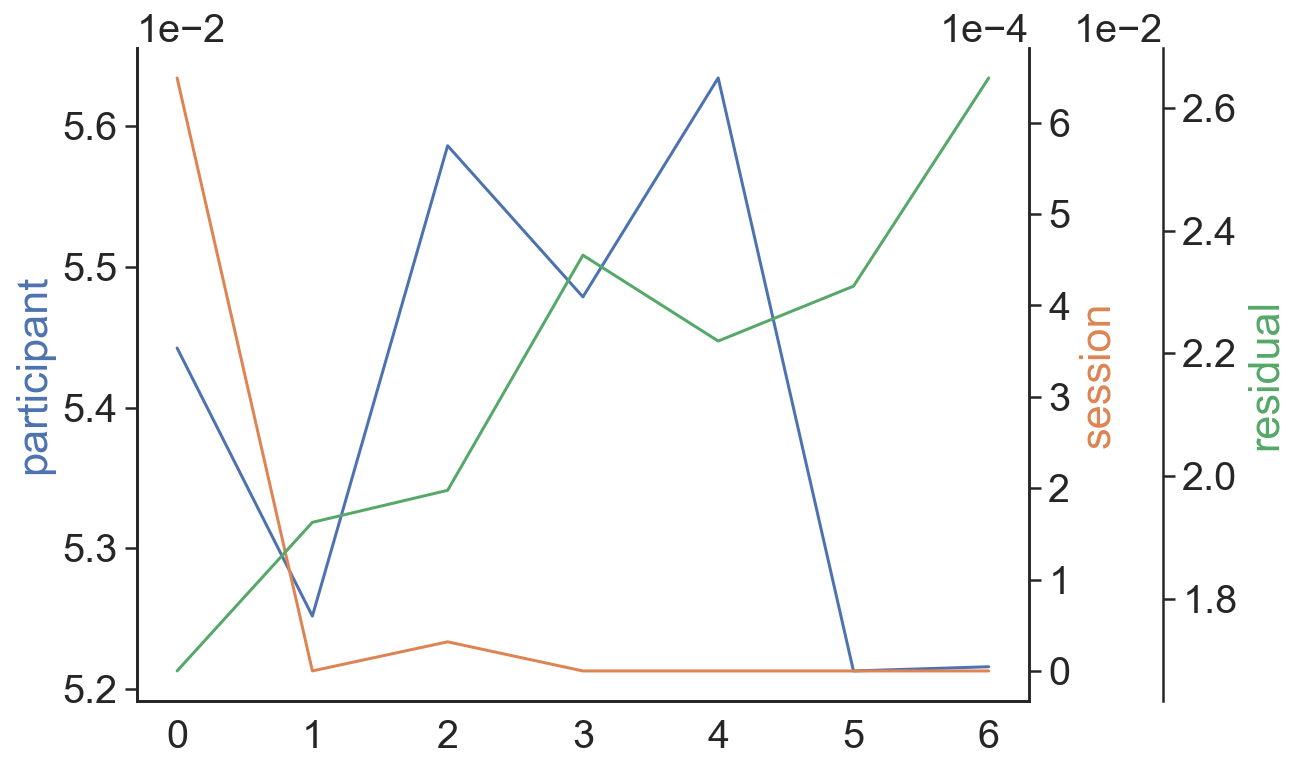

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



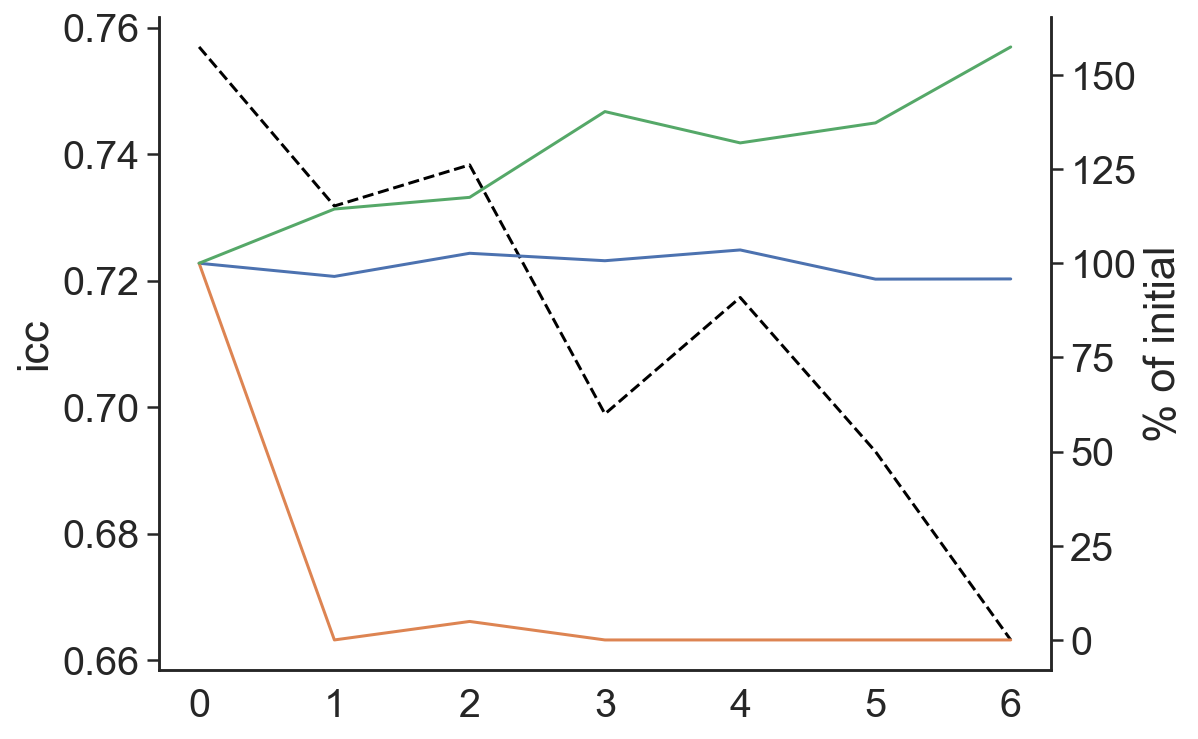

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

### Mixed

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



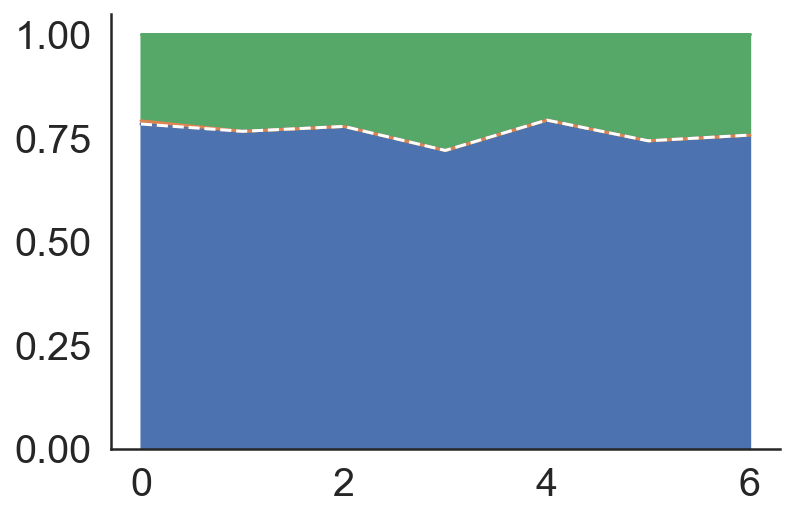

In [ ]:
ax = stats.plot_time_effect_area(scores, 8, "perc_gamble_joint_mixed")

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



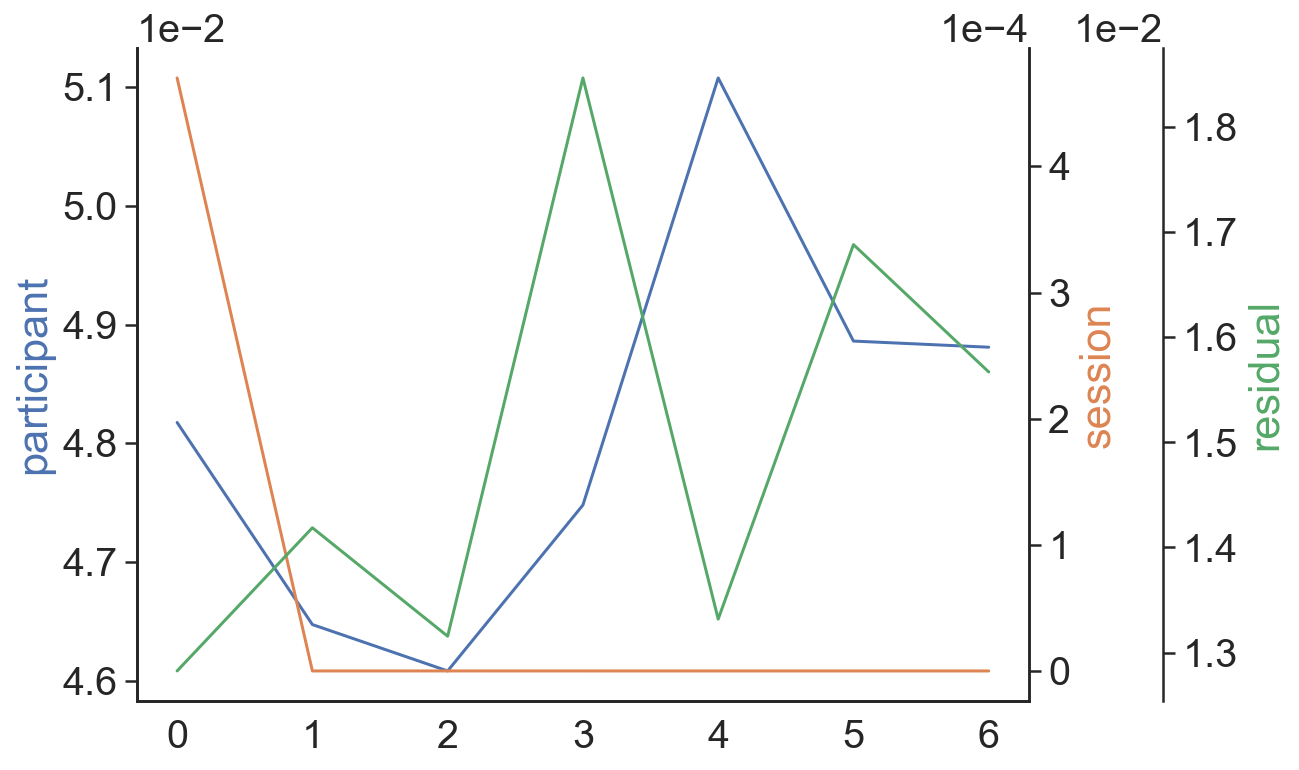

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = False)
ax.figure.set_size_inches(8, 6)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



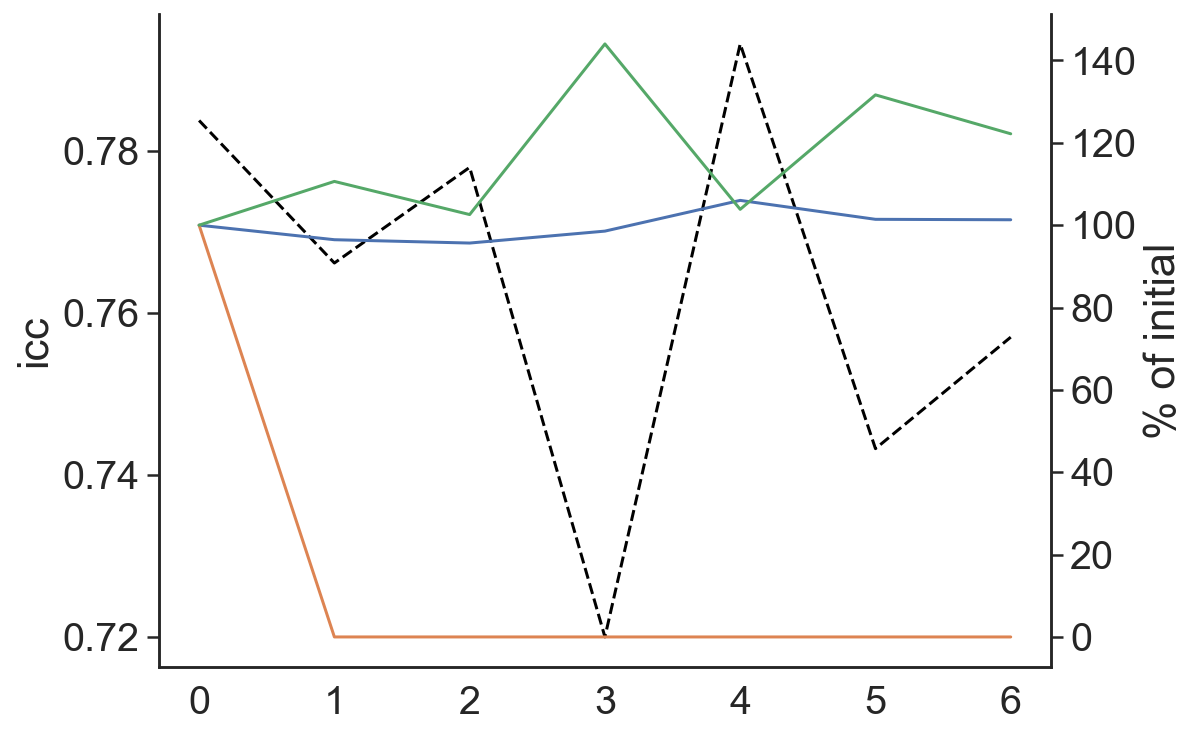

In [ ]:
ax = stats.plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = True)
ax.figure.set_size_inches(8, 6)

## Effect of time (percentage change)

In [ ]:


def get_icc_and_variance(_df,
            dependent,
           icc_type = 'ICC2', scaling = 'Percent'): 
    '''Helper function that gets ICCs and variances'''
    outcomes = stats.analyze_reliability(_df, dependent = dependent, silent = True)['iccs']
    icc = outcomes[0].query('type=="%s"'%icc_type)['ICC'].iloc[0]
    variances = outcomes[1].T
    variances.columns = ['Participant','Session','Residual','Total']
    variances = variances.loc[scaling]
    return icc,variances.loc['Participant'],variances.loc['Session'],variances.loc['Residual']


def plot_time_effect(_df, sessions, dependent, legend = False, scaling = 'Percent', change = False):
    time_data = []
    # Checking which participants have all sessions
    pps = _df.query('session_number<%d'%(sessions+1)).groupby('participant')[_df.columns[0]].agg(lambda x: len(x.dropna()))==sessions
    pps = pps[pps].index
    print("N = %d"%(len(pps)))

    for i in range(sessions-1):
        session_filter = "(session_number==1) or (session_number==%d)"%(i+2)
        __df = _df.query(session_filter)
        __df = __df[__df.participant.isin(pps)]
        d = {}
        d['icc'],d['participant'],d['session'],d['residual'] = get_icc_and_variance(__df, dependent, scaling = scaling)
        time_data.append(d)
    df = pd.DataFrame(time_data, index = pd.Series(range(sessions-1)))
    if change:
        df = (df/df.iloc[0])*100
    ax = df[['participant','session','residual']].plot(legend = legend)
    ax.figure.legend(bbox_to_anchor=[1.4, 1])
    ax.xaxis.get_major_locator().set_params(integer=True)

### Win

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular



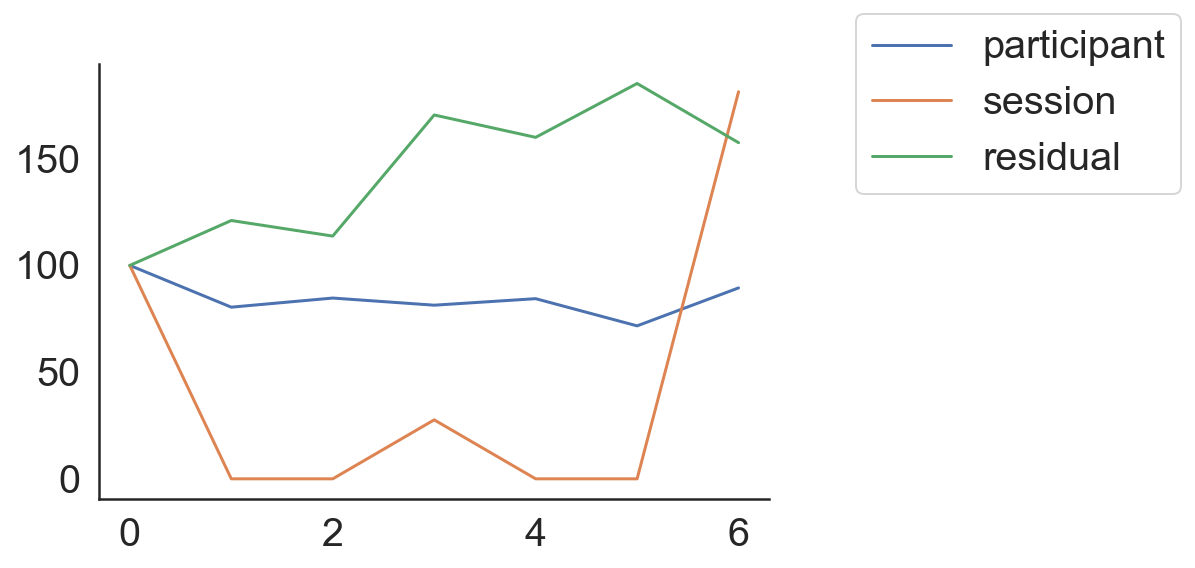

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_win", scaling = 'variance', change = True)

### Loss

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



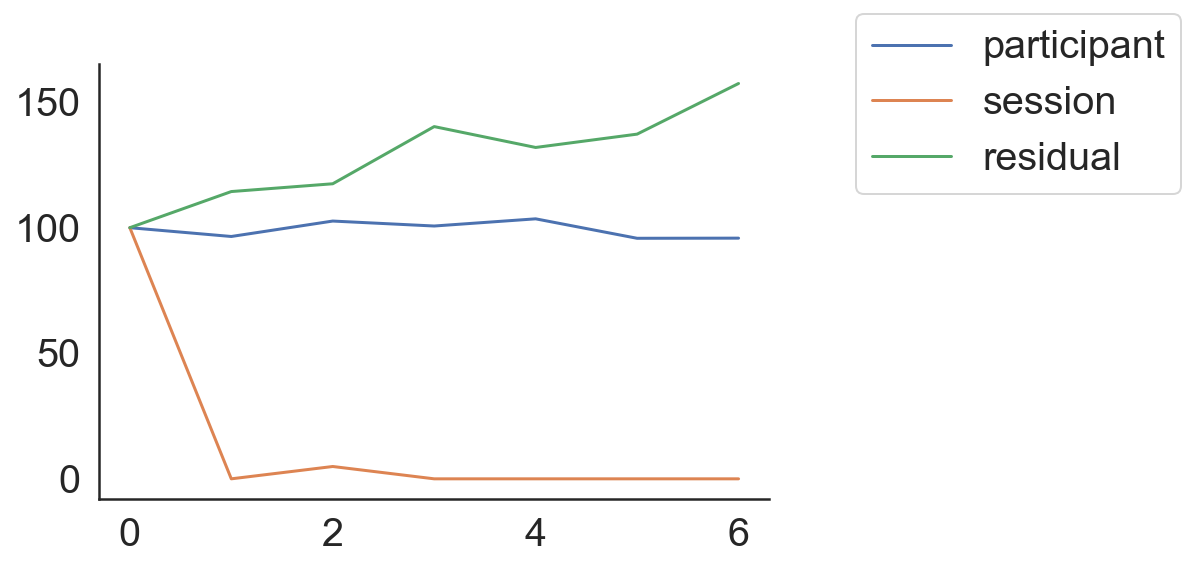

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_loss", scaling = 'variance', change = True)

### Mixed

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



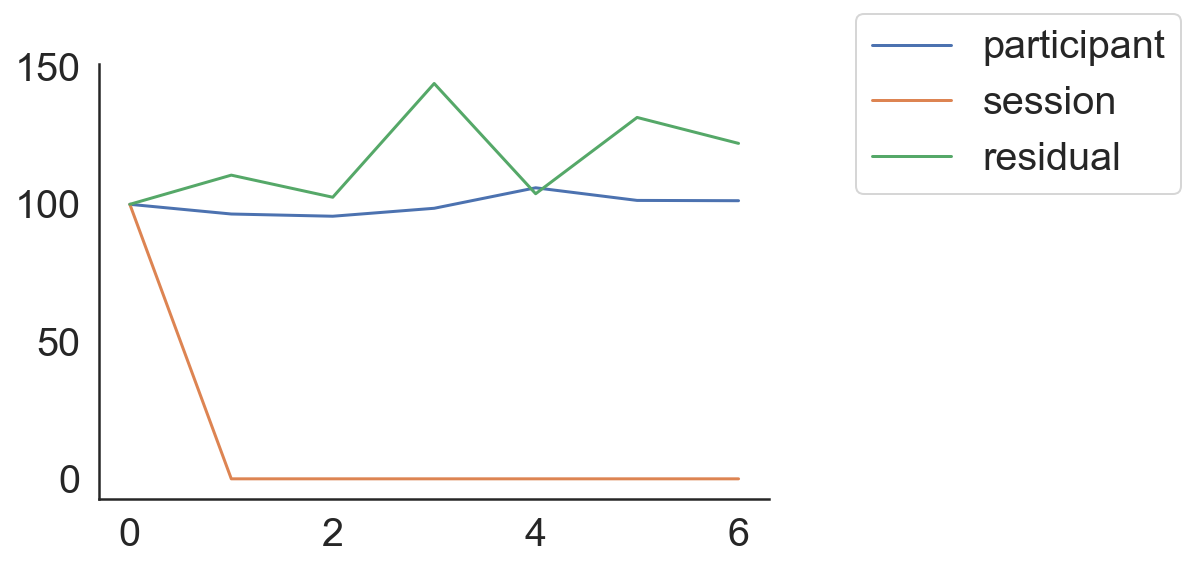

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = True)

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



N = 96


R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular

R[write to console]: boundary (singular) fit: see ?isSingular



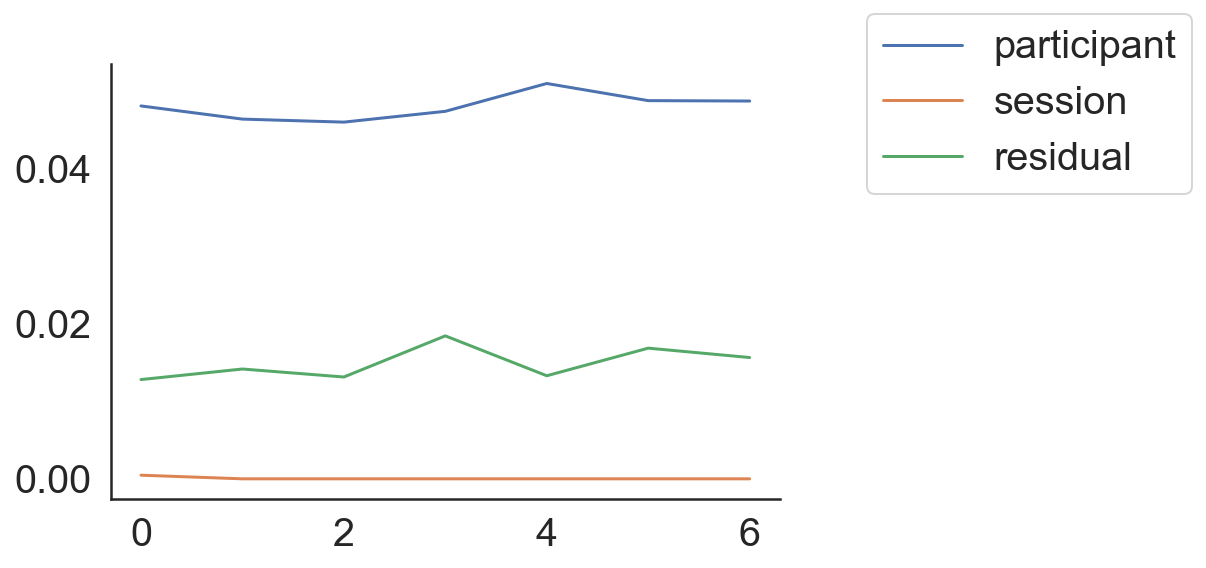

In [ ]:
plot_time_effect(scores, 8, "perc_gamble_joint_mixed", scaling = 'variance', change = False)